<h1>MNIST Classification using CNNs</h1>

---



# Importing Keras Modules


In [1]:
#Importing important modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Installing Tensorboard for Colab
!pip install tensorboardcolab

Using TensorFlow backend.


# Loading the Dataset

<h3>Download train and test sets of  MNIST dataset</h3>

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


<h4>Visualizing the dataset</h4>

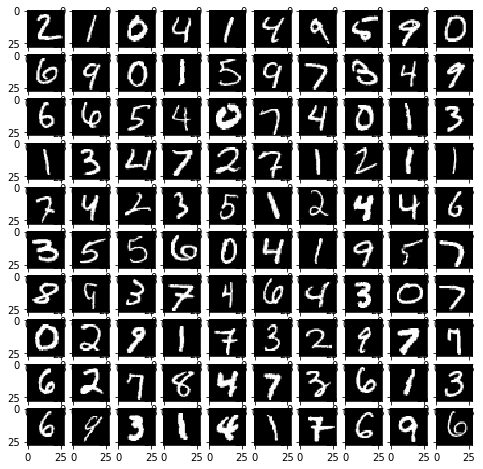

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

<h3>Reshape train and test sets into shapes compatible with keras models</h3>

<h4>Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.</h4>


In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

<h3>Pre-processing the dataset</h3>
<h4>Normalizing the input</h4>

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [0]:
batch_size = 128
num_classes = 10
epochs = 100

In [7]:
print(y_train[0])

5


<h4>Convert Labels from digits to one hot vectors</h4>

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building the CNN 

<h4>Define the layers of model</h4>

In [10]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax'))

W1116 04:29:30.525998 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1116 04:29:30.538505 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1116 04:29:30.544265 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1116 04:29:30.578202 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1116 04:29:30.582693 140589405636480 module_wrapper.py:139] From /usr/loca

<h4>Setting Optimizer and Loss function for training</h4>

In [11]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

W1116 04:29:30.660867 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1116 04:29:30.667834 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# Training the CNN 

<h4>Initializing the Tensorboard callback for visualization of training</h4>

In [12]:
#Import tensorboardcolab modules for creating a tensorboard call back which will passed in model.fit function.
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

#Tensorboard callback is going to be added to model.fit function to draw graphs of loss values after every epoch
tbc = TensorBoardColab()


Wait for 8 seconds...
TensorBoard link:
https://13d58414.ngrok.io


<h4>Initializing Early stopping and Model chekpoint callbacks </h4>

In [0]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

<h4>Fit the model to the dataset</h4>

In [0]:
#Training on the dataset and adding the all the callbacks to the fit function.
#Once the training starts, results start appearing on Tensorboard after 1 epoch
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[TensorBoardColabCallback(tbc),early_stopping,model_checkpoint])

W1116 04:29:51.654771 140589405636480 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1116 04:29:51.775492 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1116 04:29:51.859899 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W1116 04:29:51.933212 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Se

Train on 60000 samples, validate on 10000 samples


W1116 04:29:53.223856 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1116 04:29:53.225923 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W1116 04:29:53.350415 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.

W1116 04:29:55.975805 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.



Epoch 1/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.2362 - acc: 0.9272 - val_loss: 0.0546 - val_acc: 0.9812


W1116 04:30:03.516169 140589405636480 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/tensorboardcolab/callbacks.py:51: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.




Epoch 00001: val_loss improved from inf to 0.05456, saving model to mnist_cnn_checkpoint_01_loss0.0546.h5
Epoch 2/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0863 - acc: 0.9738 - val_loss: 0.0430 - val_acc: 0.9864

Epoch 00002: val_loss improved from 0.05456 to 0.04296, saving model to mnist_cnn_checkpoint_02_loss0.0430.h5
Epoch 3/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0624 - acc: 0.9809 - val_loss: 0.0335 - val_acc: 0.9893

Epoch 00003: val_loss improved from 0.04296 to 0.03355, saving model to mnist_cnn_checkpoint_03_loss0.0335.h5
Epoch 4/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.0507 - acc: 0.9846 - val_loss: 0.0341 - val_acc: 0.9895

Epoch 00004: val_loss did not improve from 0.03355
Epoch 5/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0431 - acc: 0.9869 - val_loss: 0.0293 - val_acc: 0.9904

Epoch 00005: val_loss improved from 0.03355 to 0.02932, saving mod

# Evaluating the CNN

<h4>Evaluate trained model on the test set</h4>

In [0]:
#Testing the model on test set
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<h4>Visualizing some predictions</h4>

In [0]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[3].reshape(1,28,28,1))))
print(model.predict(x_test[3].reshape(1,28,28,1)))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[36].reshape(1,28,28,1))))

# Saving the CNN

<h4>Save the trained weights and model in h5 files</h4>

In [0]:
#Set the path where you want to store the model and weights. 
model.save('./cnn_mnist.h5')
model.save_weights('./cnn_mnist_weights.h5')

# New Section